In [2]:
import numpy as np
from matplotlib import pyplot as plt


$\left( (10 - 10) \mod{10} \right)$ + 1 = 1 $\implies$ Метод Якоби

1. Реализуйте итерационный метод согласно варианту. Метод должен производить фиксированное число итераций и возвращать вектор текущего приближения, вектор невязки и его норму

In [74]:
def countBc(A, b):
  c = np.zeros(b.size)
  B = np.zeros((b.size, b.size))

  for i in range(b.size):
    for j in range(b.size):
      B[i, j] = -A[i, j] / A[i, i]
    c[i] = b[i] / A[i, i]
    B[i, i] = 0

  return B, c

def Jac(A, b, B, c, x0, iter=-1):

  x1 = np.dot(B, x0) + c
  r = np.dot(A, x0) - b

  if iter == -1:
    eps = 10**(-10)
    while True:
      x0 = x1
      x1 = np.dot(B, x0) + c
      r = np.dot(A, x1) - b
      if np.linalg.norm(r, 2) < eps:
        break

  else:
    for _ in range(iter):
      x0 = x1
      x1 = np.dot(B, x0) + c
      r = np.dot(A, x1) - b

  return x1, r, np.linalg.norm(r, 2)

2. Продемонстрируйте работоспособность метода на ряде примеров с различными матрицами и разным количеством неизвестных.


In [66]:
n = 10

A = np.random.uniform(-2, 3, size=(n, n))
diag = np.diag(A)*100
np.fill_diagonal(A, diag)

b = np.random.uniform(-2, 3, n)
B, c = countBc(A, b)

print('Норма матрицы B:', np.round(np.linalg.norm(B, 2), 2), '\n')
print('Решение встроенной функцией:', np.round(np.linalg.solve(A, b), 6))

x, r, norm = Jac(A, b, B, c, c)
print('Моё решение:                ', np.round(x, 6), '\n')

print('Вектор невязки:', np.round(r, 6))
print('Его норма:', np.round(norm, 6), '\n')
print('\n')
print('Фиксированное количество итераций')
x1, r1, norm1 = Jac(A, b, B, c, c, 1)
print('Моё решение:', np.round(x1, 6), '\n')

print('Вектор невязки:', np.round(r1, 6))
print('Его норма:', np.round(norm1, 6), '\n')

Норма матрицы B: 0.24 

Решение встроенной функцией: [ 0.037392  0.011376 -0.010838  0.164137 -0.00623  -0.001302  0.033684
  0.016894 -0.034607  0.001217]
Моё решение:                 [ 0.037392  0.011376 -0.010838  0.164137 -0.00623  -0.001302  0.033684
  0.016894 -0.034607  0.001217] 

Вектор невязки: [ 0.  0. -0.  0. -0. -0.  0.  0. -0. -0.]
Его норма: 0.0 



Фиксированное количество итераций
Моё решение: [ 0.03742   0.011359 -0.010823  0.164148 -0.006288 -0.001294  0.033726
  0.016873 -0.03461   0.001225] 

Вектор невязки: [-0.001419 -0.001786 -0.002603  0.00028  -0.004069  0.001829 -0.001701
 -0.00292   0.000165  0.000252]
Его норма: 0.006593 



3. Реализуйте метод вычисления коэффициентов $\alpha_k$ разложения вектора $\displaystyle x = \sum_{i=1}^n \alpha_i \varphi^i$ по ортонормированному базису $\varphi^k, k \in [1, n]$

$\displaystyle \psi_j^k = \sin{(\pi k j h)}, \quad h = \frac{1}{n+1}, \quad k, j \in [1, n]$

$\displaystyle \varphi^k = \frac{\psi^k}{||\psi_j^k||_2}$

In [75]:
n = 21
h = 1/(n+1)
psi = np.zeros((n, n))

for j in range(1, n+1):
  for k in range(1, n+1):
    psi[j-1, k-1] = np.sin(np.pi*k*j*h)

norms = np.zeros(n)

#print(np.round(psi, 3))

for j in range(n):
  norms[j] = np.linalg.norm(psi[:, j], 2)

phi = np.zeros((n, n))

for j in range(n):
  phi[:, j] = psi[:, j] / norms[j]

x = np.random.uniform(0, 1, n)

alpha = np.zeros(n)

for i in range(n):
  alpha[i] = np.dot(x, phi[:, i])


sum = 0
for i in range(n):
  sum += phi[:, i]*alpha[i]

print('Исходный вектор:               ', np.round(x, 4))
print('Вектор, полученный разложением:', np.round(sum, 4))


Исходный вектор:                [0.3315 0.503  0.0571 0.9385 0.5924 0.5992 0.6515 0.32   0.0744 0.0583
 0.2729 0.2035 0.8058 0.7857 0.8263 0.0948 0.1823 0.6347 0.2621 0.991
 0.9147]
Вектор, полученный разложением: [0.3315 0.503  0.0571 0.9385 0.5924 0.5992 0.6515 0.32   0.0744 0.0583
 0.2729 0.2035 0.8058 0.7857 0.8263 0.0948 0.1823 0.6347 0.2621 0.991
 0.9147]


4. Рассмотрите систему с матрицей $A_h$, возникающей при конечно-разностной аппроксимации одномерного стационарного уравнения теплопроводности.


In [76]:
n = 21
h = 0.2
Ah = np.zeros((n, n))
np.fill_diagonal(Ah, 2)
np.fill_diagonal(Ah[1:, :], -1)
np.fill_diagonal(Ah[:, 1:], -1)
#print(Ah)
Ah = 1/(h**2)*Ah

b = np.random.uniform(-5, 5, n)

B1, c1 = countBc(Ah, b)
print('Норма матрицы B:', np.round(np.linalg.norm(B1, 2), 3), '\n')
x2, r2, norm2 = Jac(Ah, b, B1, c1, c1)

x = np.linalg.solve(Ah, b)
#print('Решение встроенной функцией:', np.round(x, 10))
print('Норма решение Якоби:              ', np.linalg.norm(x2, 2))
print('Норма решения встроенной функцией:', np.linalg.norm(x, 2))

# метод прогонки
def solve(A, b):
    n = b.size
    res = np.zeros(n)
#Прямой ход
    v, u = np.zeros(n), np.zeros(n)

  #0-ая строка
    v[0], u[0] = (A[0][1])/(-A[0][0]), (-b[0])/(-A[0][0])

  #без 0-ой и (n-1)-ой строк
    for i in range(1, n-1):
        v[i] = (A[i][i+1])/(-A[i][i] - A[i][i-1]*v[i-1])
        u[i] = (A[i][i-1]*u[i-1] - b[i])/(-A[i][i] - A[i][i-1]*v[i-1] )

  #(n-1)-ая строка
    v[n-1] = 0
    u[n-1] = (A[n-1][n-2]*u[n-2] - b[n-1])/(-A[n-1][n-1] - A[n-1][n-2]*v[n-2])

#Обратный ход
    res[n-1] = u[n-1]
    for i in range(n-1, 0, -1):
        res[i-1] = v[i-1] * res[i] + u[i-1]
    return res


xPr = solve(Ah, b)
#print('Решение прогонкой:          ', np.round(xPr, 10))
print('Норма решения прогонкой:          ', np.linalg.norm(xPr, 2))



Норма матрицы B: 0.99 

Норма решение Якоби:               2.0488926690017744
Норма решения встроенной функцией: 2.04889266906837
Норма решения прогонкой:           2.0488926690683704


5. Вычислите векторы ошибки $e^p = x - x^p$ для $p = 0, 10, 20, ..., 200$, где $x$ - точное решение СЛАУ

In [77]:
x = np.copy(x2)
print('Норма точного решения:', np.linalg.norm(x, 2))

p = np.arange(0, 210, 10)
#print(p)
e = np.zeros((n, n))

x0, r0, norm0 = Jac(Ah, b, B1, c1, c1, p[0])
e[:, 0] = x - x0

for i in range(1, n):
  x2 = x0
  x0, r0, norm0 = Jac(Ah, b, B1, c1, x2, 10)
  e[:, i] = x - x0


Норма точного решения: 2.0488926690017744


6. Вычислите разложение векторов $e^p$ по базису $\varphi^k$

In [78]:
alpha = np.zeros((p.size, p.size))

for i in range(p.size):
  for j in range(p.size):
    alpha[j][i] = np.dot(phi[:, j], e[:, i])

sum = np.zeros((p.size, p.size))

for i in range(p.size):
  sum1 = np.zeros(p.size)
  sum1 = np.dot(phi, alpha[:, i])
  sum[:, i] = sum1

#print(e[:, 0], '\n')
#print(sum[:, 0])

res = np.zeros(p.size)
for i in range(p.size):
  if np.round(np.linalg.norm(e[:, i], 2), 10) != np.round(np.linalg.norm(sum[:, i], 2), 10):
    res[i] = 1

print('Количество ошибок:', res.sum())


Количество ошибок: 0.0


7. Постройте графики зависимости коэффициентов $|\alpha_k^p|$ от номера итерации $p$ для разных коэффициентов $k$ в логорифмической шкале.

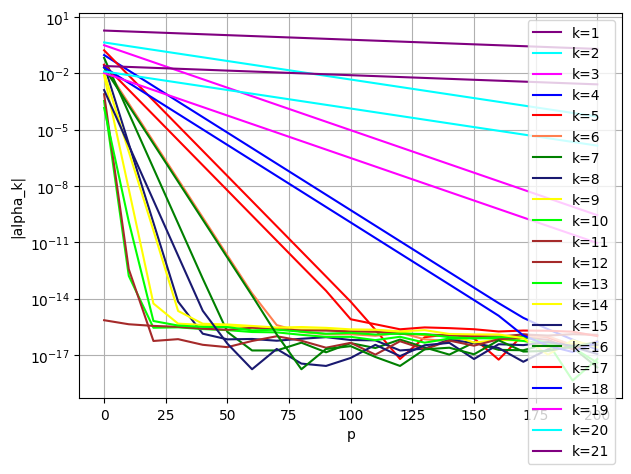

In [86]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))

col = np.array(['purple', 'cyan', 'fuchsia', 'blue', 'red', 'coral', 'green', 'midnightblue', 'yellow', 'lime', 'brown',
                'brown', 'lime', 'yellow', 'midnightblue', 'green', 'red', 'blue', 'fuchsia', 'cyan', 'purple'])

lab = np.array(['k=1', 'k=2', 'k=3', 'k=4', 'k=5', 'k=6', 'k=7', 'k=8', 'k=9', 'k=10', 'k=11',
                'k=12', 'k=13', 'k=14', 'k=15', 'k=16', 'k=17', 'k=18', 'k=19', 'k=20', 'k=21'])

axs.set_xlabel('p')
axs.set_ylabel('|alpha_k|')
axs.grid()


for i in range(0, 21):
  axs.plot(p, np.abs(alpha[i, :]), color=col[i], label=lab[i])

plt.legend()
plt.legend(loc='upper right')

#plt.xscale('log')
plt.yscale('log')
plt.show()


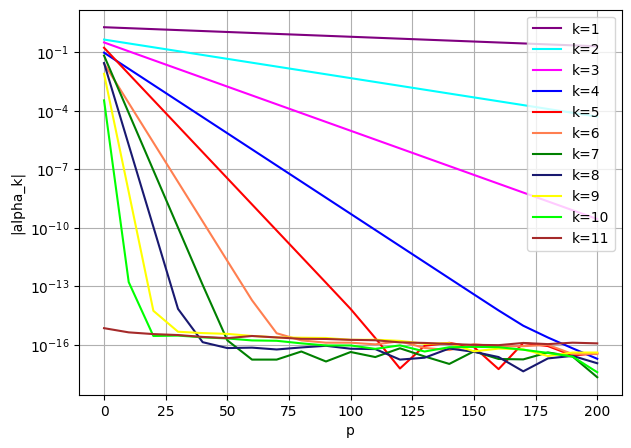

In [87]:
fig, axs = plt.subplots(1, 1, figsize=(7, 5))

col = np.array(['purple', 'cyan', 'fuchsia', 'blue', 'red', 'coral', 'green', 'midnightblue', 'yellow', 'lime', 'brown'])

lab = np.array(['k=1', 'k=2', 'k=3', 'k=4', 'k=5', 'k=6', 'k=7', 'k=8', 'k=9', 'k=10', 'k=11'])

axs.set_xlabel('p')
axs.set_ylabel('|alpha_k|')
axs.grid()


for i in range(0, 11):
  axs.plot(p, np.abs(alpha[i, :]), color=col[i], label=lab[i])

plt.legend()
plt.legend(loc='upper right')

#plt.xscale('log')
plt.yscale('log')
plt.show()

8. Проанализируйте полученные графики и попробуйте сделать вывод о том, есть ли какая-либо зависимость между номером $k$ коэффициента $\alpha_k^p$ и скоростью его стремления к нулю


Зависимости не наблюдается